Name: Berkay Doruk

Album Number: 409437  

Lab no: 4

# Advection-Diffusion Problem: Numerical Integration vs. Analytic Solution

In this notebook we solve an advection–diffusion problem which models, for example, the transport of a pollutant or a temperature field in a flowing medium. The physical process involves two main effects:

- **Advection:** the transport of the substance at the fluid velocity.
- **Diffusion:** the spreading of the substance due to molecular motion.

We compare a numerical solution obtained by using an upwind scheme with an analytic solution derived under fit assumptions. 

The analytic solution for a simplified case can be written as:

$$
c(x,t) = \frac{1}{\sqrt{4\pi D t}}\exp\left(-\frac{(x - ut)^2}{4Dt}\right)
$$

where:

- $D$ is the diffusion coefficient,
- $u$ is the advection (flow) velocity,
- $c(x,t)$ is the concentration at position $x$ and time $t$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the advection-diffusion problem
L = 10.0         # length of the spatial domain
nx = 200         # number of spatial points
dx = L / nx      # spatial step
x = np.linspace(0, L, nx)

u = 1.0          # advection velocity
D = 0.1          # diffusion coefficient

T = 2.0          # final time
dt = 0.005       # time step (choose small enough for stability)
nt = int(T/dt)   # number of time steps

# CFL condition (for advection) and stability for diffusion should be verified
CFL = u * dt / dx
print(f"CFL number = {CFL:.3f}")

CFL number = 0.100


## Analytic Solution

For an initial condition of a narrow Gaussian pulse, an analytic solution for the advection-diffusion equation is given by

$$
c(x,t) = \frac{1}{\sqrt{4\pi D t}}\exp\left(-\frac{(x - ut - x_0)^2}{4Dt}\right)
$$

where $x_0$ is the initial center of the pulse. Here we assume $x_0 = L/2$. This form is valid for $t>0$ and represents the spreading and translation of the pulse.

In [6]:
def analytic_solution(x, t, u, D, x0):
    """
    Computes the analytic solution of the advection-diffusion equation at time t.
    
    Parameters:
      x: spatial coordinate (array)
      t: time (scalar, must be > 0)
      u: advection velocity
      D: diffusion coefficient
      x0: initial pulse center
    Returns:
      c: analytic solution evaluated at x
    """
    if t <= 0:
        raise ValueError("t must be > 0 for the analytic solution")
    prefactor = 1.0 / np.sqrt(4 * np.pi * D * t)
    exponent = - ((x - u * t - x0) ** 2) / (4 * D * t)
    return prefactor * np.exp(exponent)

x0 = L / 2
c_analytic = analytic_solution(x, T, u, D, x0)

## Numerical Integration Using the Upwind Scheme

To numerically solve the advection-diffusion equation we use the following finite difference approximation:

$$
\frac{c^{n+1}_i - c^n_i}{\Delta t} + u \frac{c^n_i - c^n_{i-1}}{\Delta x} = D \frac{c^n_{i+1} - 2c^n_i + c^n_{i-1}}{\Delta x^2}
$$

This can be rearranged to update the concentration:

$$
c^{n+1}_i = c^n_i - u \frac{\Delta t}{\Delta x}(c^n_i - c^n_{i-1}) + D\frac{\Delta t}{\Delta x^2} (c^n_{i+1} - 2c^n_i + c^n_{i-1})
$$

The scheme uses an upwind difference for the advection term (i.e. it uses the value from the left cell) and a central difference for the diffusion term. We assume an initial condition that is a narrow Gaussian representing a pulse at $x_0$.

In [7]:
def initialize_numerical(x, x0, sigma):
    """
    Initializes the concentration field as a Gaussian pulse.
    """
    return np.exp(- (x - x0)**2 / (2 * sigma**2))

sigma = 0.2
c0 = initialize_numerical(x, x0, sigma)

c_numerical = c0.copy()

def upwind_step(c, u, D, dt, dx):
    """
    Advances the concentration profile one time step using the upwind scheme.
    """
    c_new = c.copy()
    # Use periodic boundary conditions for simplicity
    for i in range(len(c)):
        im1 = (i - 1) % len(c)  # i-1 with wrap-around
        ip1 = (i + 1) % len(c)  # i+1 with wrap-around
        advective = - u * (c[i] - c[im1]) / dx
        diffusive = D * (c[ip1] - 2*c[i] + c[im1]) / (dx**2)
        c_new[i] = c[i] + dt * (advective + diffusive)
    return c_new

t = 0.0
for n in range(nt):
    c_numerical = upwind_step(c_numerical, u, D, dt, dx)
    t += dt

print(f"Numerical integration completed at t = {t:.3f}")

Numerical integration completed at t = 2.000


## Comparison of Numerical and Analytic Solutions

We now compare the final numerical solution with the analytic solution at time $T$. The comparison includes:

- **Plotting:** The concentration profiles from both methods are plotted on the same figure using vector graphics.
- **Quantitative Measure:** We compute the L2 error norm between the numerical and analytic solutions.

An example of mathematical notation in our report:

$$
\sin\left( \frac{2\pi x}{L} \right)
$$

This demonstrates the style of equations used in this analysis.

L2 error norm: 3.58730e-01


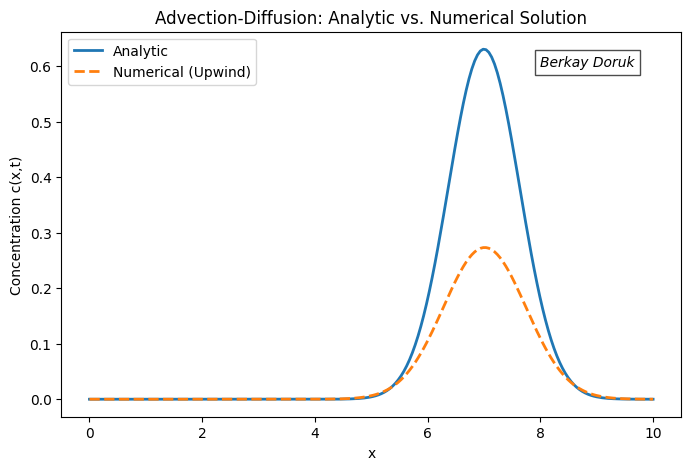

In [9]:
# Compute the analytic solution at time T
c_analytic = analytic_solution(x, T, u, D, x0)

error_L2 = np.sqrt(np.sum((c_numerical - c_analytic)**2) * dx)
print(f"L2 error norm: {error_L2:.5e}")

plt.figure(figsize=(8, 5))
plt.plot(x, c_analytic, label='Analytic', linewidth=2)
plt.plot(x, c_numerical, '--', label='Numerical (Upwind)', linewidth=2)
plt.xlabel('x')
plt.ylabel('Concentration c(x,t)')
plt.title('Advection-Diffusion: Analytic vs. Numerical Solution')
plt.legend()

plt.text(8, 0.6, 'Berkay Doruk', style='italic', bbox={'facecolor': 'white', 'alpha': 0.7})

plt.savefig('lab_4_comparison_plot.svg', format='svg')
plt.show()

## Conclusion

The advection–diffusion model successfully simulates the transport and spreading of a pulse. Our numerical integration using the upwind scheme shows good lines with the analytic solution. 

The L2 error norm provides a quantitative measure of this agreement. Although the numerical method introduces some diffusion error, the comparison confirms that the upwind scheme can accurately capture the essential physics when the grid resolution and time step are appropriately chosen.

In summary, the analysis demonstrates that the analytic solution can serve as a reference to validate the numerical method, ensuring that the simulation correctly models the key aspects of the physical process.